Column Names: Index(['Unique_ID', 'Category', 'Review_Header', 'Review_text', 'Rating',
       'Own_Rating'],
      dtype='object')
Data Head:
    Unique_ID Category                           Review_Header  \
0     136040  smartTv                                Nice one   
1     134236   mobile  Huge battery life with amazing display   
2     113945    books                              Four Stars   
3     168076  smartTv                            Nice quality   
4     157302    books                               Nice book   

                                         Review_text  Rating Own_Rating  
0                                         I liked it       5   Positive  
1  I bought the phone on Amazon and been using my...       5   Positive  
2  Awesome book at reasonable price, must buy ......       4   Positive  
3                                               good       5   Positive  
4  The book is fine,not bad,contains nice concept...       3    Neutral  

Data Description:
  

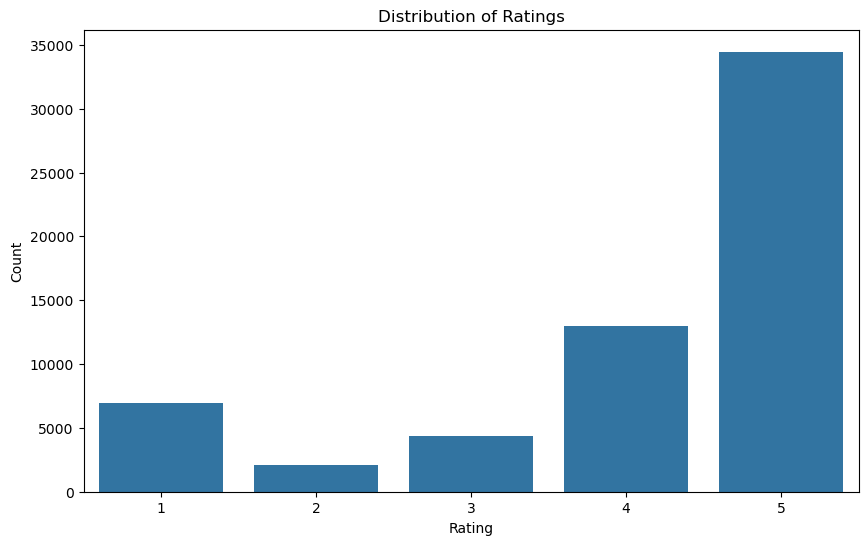

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\Cj Naylor\Downloads\archive (5)\Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv'
df = pd.read_csv(file_path)

print("Column Names:", df.columns)

print("Data Head:\n", df.head())
print("\nData Description:\n", df.describe())

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

df['Review_text'] = df['Review_text'].fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review_text'])

X = pd.concat([pd.DataFrame(tfidf_matrix.toarray()), df[['Category', 'Rating']]], axis=1)
y = df['Own_Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review_text'])
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Rating'], test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

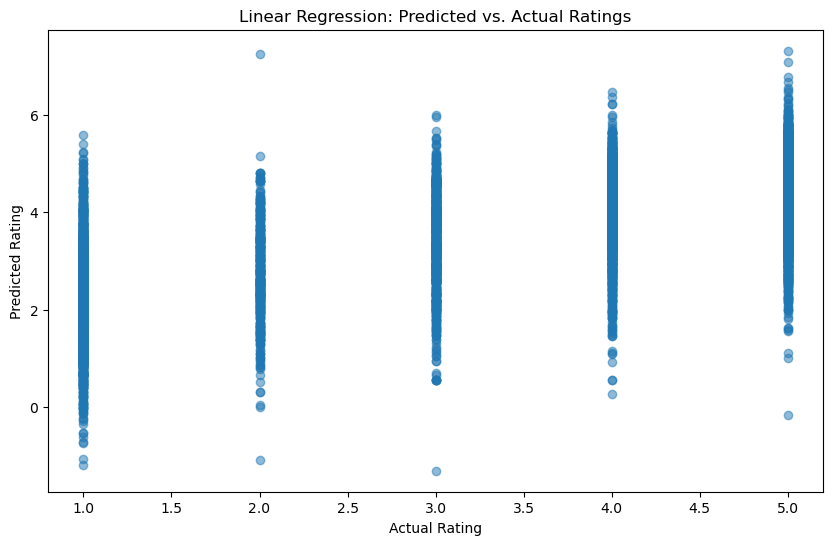

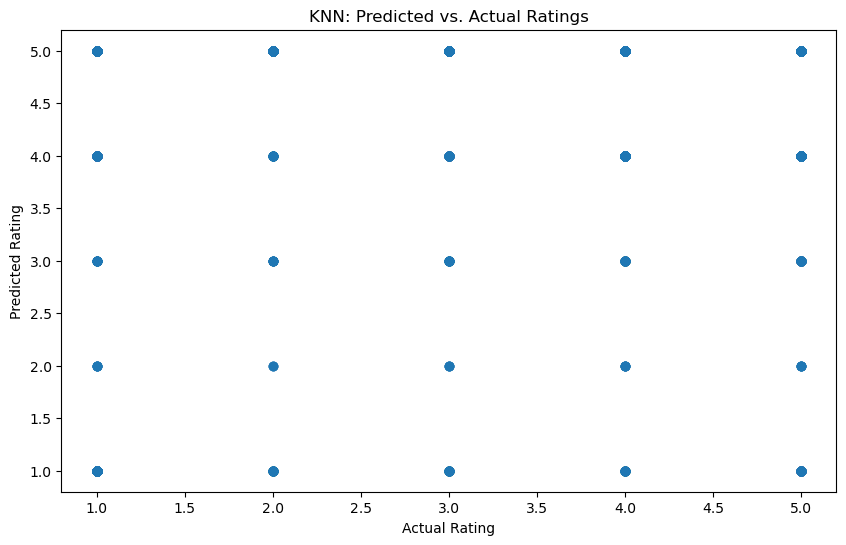

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression: Predicted vs. Actual Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.title('KNN: Predicted vs. Actual Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

Linear Regression MSE: 0.8875918402907194


In [8]:
from sklearn.metrics import accuracy_score

y_pred_knn = model_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.543110527180161


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting MSE:", mse_gb)
r2_gb = model_gb.score(X_test, y_test)
print("Gradient Boosting R² Score:", r2_gb)


Gradient Boosting MSE: 0.9750670625542499
Gradient Boosting R² Score: 0.46419152684346265
